# RNN 학습 노드 베껴쓰기

### 4-2. 텍스트 감정분석의 유용성   
오늘 우리는 딥러닝을 통해 텍스트에 담긴 감성을 분석(Sentimental Analysis)하는 방법을 배워 볼 것입니다. 
구체적으로는 IMDB 나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 긍정적인지 혹은 부정적인지를 분류(Classification)할 수 있는 
딥러닝 모델을 만들어 볼 것입니다.

그런데 딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용할까요? 
이 막연한 질문을 좀 더 세부적인 질문으로 잘게 쪼개면 다음과 같은 질문들로 나눠볼 수 있을 것입니다.

텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?   
감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 점에서 도움을 주나요?   
텍스트 데이터 분석의 기술적 어려움은 무엇인가요?   
텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?   
이 질문들에 답을 제공하는 유용한 아티클 하나를 소개하겠습니다. 이 아티클을 정독하시면서 위 질문들에 대한 답을 찾아서 스스로 정리해 보시기 바랍니다. 하지만 정답이 있는 것은 아닙니다.
이 아티클을 통해 산업현장에서 텍스트 분류가 실제로 활용되는 구체적인 사례도 확인할 수 있습니다.

참고문헌 : 동아비지니스리뷰 감성분석 활용사례 기고
https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine



### 4-3. 텍스트 데이터의 특징   
인공지능 모델을 입력과 출력이 정해진 함수라고 생각해 봅시다. 예를 들어 MNIST 숫자 분류기 모델이라면 이미지 파일을 읽어들인 매트릭스가 입력이 되고, 이미지 파일에 씌여 있는 실제 숫자 값이 출력이 되는 함수가 될 것입니다.
이제 텍스트 문장을 입력으로 받아서 그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 생각해 봅시다. 이 모델을 만들기 위해서는 숫자 분류기를 만들 때는 생각할 필요가 없었던 2가지 문제가 생깁니다.

텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?   
텍스트에는 순서가 중요합니다. 입력데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?   

### 4-4. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법
인공지능 모델의 입력이 될 수 있는 것은 0과 1의 비트로 표현 가능한 숫자만으로 이루어진 매트릭스 뿐입니다.   
아주 단순히, A=0, B=1, …, Z=25 라고 숫자를 임의로 부여한다고 해봅시다.   
그러면 의미적으로 A와 B는 1만큼 멀고, A와 Z는 25만큼 멀까요? 그렇지 않습니다.   
텍스트의 중요한 특징은 그 자체로는 기호일 뿐이며, 텍스트가 내포하는 의미를 기호가 직접 내포하지 않는다는 점입니다.   

하지만 우리는 우선 단어 사전을 만들어 볼 수는 있습니다. 우리가 사용하는 국어, 영어 사전에는 단어와 그 의미 설명이 짝지어져 있습니다.   
우리가 하려는 것은 단어와, 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것입니다. 그런데 그 벡터는 어디서 가져올까요? 그렇습니다. 우리는 딥러닝을 통해 그 벡터를 만들어 낼 수 있습니다.   

아래와 같이 단 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제를 생각해 보겠습니다.   

i feel hungry   
i eat lunch   
now i feel happy   

In [7]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [8]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

# 인덱스와 텍스트를 딕셔너리로 매칭
print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [9]:
# 인덱스 : 텍스트 를 텍스트 : 인덱스 로 바꾸자
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [10]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [11]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


`get_encoded_sentence` 함수를 통해 아래와 같이 맵핑된 것이 확인되시나요?

`<BOS>` -> 1   
i -> 3   
eat -> 6   
lunch -> 7   

In [12]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [13]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [14]:
# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


### 4-5. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장
텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다. 'i feel hungry'가 [1, 3, 4, 5]로 변환되었지만 이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과합니다. 우리가 하려는 것은 단어와, 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다. 그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화하게 됩니다. Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미벡터 파라미터를 구현한 Embedding 레이어를 제공합니다. 아래 과정은 임베딩 레이어를 통해 word가 벡터화되는 과정입니다.


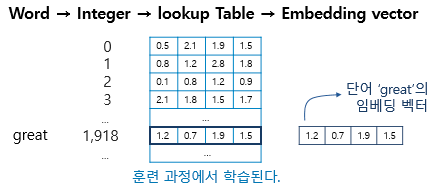
   

위 그림에서 word_to_index('great')는 1918입니다. 그러면 'great'라는 단어의 의미공간상의 워드벡터(word vector)는 Lookup Table형태로 구성된 Embedding 레이어의 1919번째 벡터가 됩니다. 위 그림에서는 [1.2, 0.7, 1.9, 1.5]가 됩니다. Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드벡터 텐서 형태로 다시 표현해 보겠습니다.

In [15]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
from tensorflow import keras

# vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
# word_vector_dim = 4    # 위 그림과 같이 4차원의 워드벡터를 가정합니다. 

# embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# # 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
# # list 형태의 sentences는 numpy array로 변환되어야 딥러닝 레이어의 입력이 될 수 있습니다.
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))
# output = embedding(raw_inputs)
# print(output)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


실행해 보니 에러가 발생합니다. 왜 그럴까요?

주의해야 할 점이 있습니다. Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다.    
raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.
Tensorflow에서는 keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해 문장 벡터 뒤에 패딩(`<PAD>`)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

In [16]:
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다. `<PAD>` 가 0에 맵핑되어 있다는 걸 기억하세요.

그러면 위에 시도했던 output = embedding(raw_inputs)을 다시 시도해 봅시다.

In [17]:
import numpy as np
import tensorflow as tf

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.03582568  0.01271    -0.01400597 -0.0494198 ]
  [ 0.00506245  0.02511531 -0.00136541  0.03337953]
  [-0.01285106  0.0224709   0.02612853 -0.04207416]
  [ 0.03268161  0.01706029  0.03460798  0.02676547]
  [-0.01852017 -0.01328699 -0.03149348 -0.04591003]]

 [[-0.03582568  0.01271    -0.01400597 -0.0494198 ]
  [ 0.00506245  0.02511531 -0.00136541  0.03337953]
  [ 0.03797795  0.02227867  0.03748212 -0.00473968]
  [ 0.03292124 -0.01788372 -0.02467585  0.04474911]
  [-0.01852017 -0.01328699 -0.03149348 -0.04591003]]

 [[-0.03582568  0.01271    -0.01400597 -0.0494198 ]
  [ 0.02297748 -0.04576157 -0.00224543  0.00460136]
  [ 0.00506245  0.02511531 -0.00136541  0.03337953]
  [-0.01285106  0.0224709   0.02612853 -0.04207416]
  [-0.00886764  0.03637934 -0.03880745 -0.00275285]]], shape=(3, 5, 4), dtype=float32)


/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


### 4-6. 시퀀스 데이터를 다루는 RNN
텍스트 데이터를 다루는데 주로 사용되는 딥러닝 모델은 바로 Recurrent Neural Netowrk(RNN)입니다.    
RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있습니다.   

텍스트 데이터도 시퀀스 데이터라는 관점으로 해석할 수 있습니다만, 시퀀스 데이터의 정의에 가장 잘 어울리는 것은 음성 데이터가 아닐까 합니다.   
시퀀스 데이터란 바로 입력이 시간축을 따라 발생하는 데이터입니다.    
예를 들어 이전 스텝의 'i feel hungry'라는 문장을 누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음했다고 합시다.   

at time=0s : 듣는이의 귀에 들어온 input='i'   
at time=1s : 듣는이의 귀에 들어온 input='feel'   
at time=2s : 듣는이의 귀에 들어온 input='hungry'   

time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지입니다.    
그 다음에 'hungry'가 올지, 'happy'가 올지 알 수 없는 상황입니다.    
RNN은 그런 상황을 묘사하기에 가장 적당한 모델 구조를 가지고 있습니다.    
왜냐하면 RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 현재 상태를 묘사하는 state machine으로 설계되었기 때문입니다.   


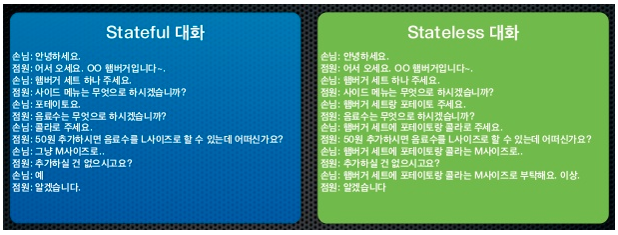

다음 동영상을 통해 RNN의 기본 개념과 설계 구조를 좀더 구체적으로 확인해 본 후 다음 질문에 대답해 봅시다.

김성훈 교수의 모두의 딥러닝 강좌 12강.RNN (https://www.youtube.com/watch?v=-SHPG_KMUkQ&feature=youtu.be)

그러면 RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제코드를 구현해 보겠습니다.

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

### 4-7. 꼭 RNN이어야 할까?
텍스트를 처리하기 위해 RNN이 아니라 1-D Convolution Neural Network(1-D CNN)을 사용할 수도 있습니다.   
우리는 이미지 분류기를 구현하면서 2-D CNN을 이미 사용해 본 바 있습니다.(보통 1-D는 가끔 사용되고, 2-D는 텍스트에 거의 사용되지 않는다.)    
이미지는 시퀀스 데이터가 아닙니다. 이미지 분류기 모델에는 이미지 전체가 한꺼번에 입력으로 사용됩니다.   
그러므로 1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝하면서 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됩니다.    
이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여줍니다.   
그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습속도도 훨씬 빠르게 진행된다는 장점이 있습니다.   

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

아주 간단히는 `GlobalMaxPooling1D()` 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다.    
이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데,    
의외로 성능이 잘 나올 수도 있습니다.

이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나, FFN(FeedForward Network) 레이어만으로 구성하거나, 
혹은 최근 각광받고 있는 Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있습니다.

In [1]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

### 4-8. IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석
이제 본격적으로 IMDB 영화리뷰 감성분석 태스크에 도전해 보겠습니다. 
IMDB Large Movie Dataset은 50000개의 영어로 작성된 영화 리뷰 텍스트로 구성되어 있으며, 긍정은 1, 부정은 0의 라벨이 달려 있습니다.

50000개의 리뷰 중 절반인 25000개가 훈련용 데이터, 나머지 25000개를 테스트용 데이터로 사용하도록 지정되어 있습니다.   
이 데이터셋은 tensorflow Keras 데이터셋 안에 포함되어 있어서 손쉽게 다운로드하여 사용할 수 있습니다.  
이후 스텝의 imdb 데이터셋 처리 코드 중 일부는 Tensorflow 튜토리얼에 언급된 데이터 전처리 로직을 참고하였음을 밝힙니다.   

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

# IMDB 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

2.2.0


/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


훈련 샘플 개수: 25000, 테스트 개수: 25000


/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


`imdb.load_data()` 호출시 단어사전에 등재할 단어의 개수(`num_words`)를 10000으로 지정하면,   
그 개수만큼의 `word_to_index` 딕셔너리까지 생성된 형태로 데이터셋이 생성됩니다.  

다운받은 데이터 실제 예시를 확인해 보겠습니다.

In [2]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨   긍정 :1 / 부정 : 0
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


텍스트 데이터가 아니라 이미 숫자로 encode된 텍스트 데이터를 다운로드받았음을 확인할 수 있습니다.   
이미 텍스트가 encode되었으므로 IMDB 데이터셋에는 encode에 사용한 딕셔너리까지 함께 제공합니다.

In [3]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


IMDB 데이터셋의 텍스트 인코딩을 위한 `word_to_index`, `index_to_word`는 아래와 같이 보정되어야 합니다.    
아래 내용은 Tensorflow 튜토리얼의 가이드를 반영하여 작성하였습니다.   
`word_to_index`는 IMDB 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬되어 있습니다.

In [4]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

NameError: name 'word_to_index' is not defined

다운받은 데이터셋이 확인되었습니다.    
마지막으로, encode된 텍스트가 정상적으로 decode되는지 확인해 보겠습니다.

In [25]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

decode한 문장과 라벨을 비교하여 일치하는지 확인해 주세요.

`pad_sequences`를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.   
문장 최대 길이 `maxlen`의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다.    
이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.   

In [26]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


위의 경우에는 `maxlen=580`이 됩니다.   
또 한가지 유의해야 하는 것은 padding 방식을 문장 뒷쪽('post')과 앞쪽('pre') 중 어느쪽으로 하느냐에 따라   
RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다는 점입니다.    
두 가지 방식을 한번씩 다 적용해서 RNN을 학습시켜 보면서 그 결과를 비교해 보시기 바랍니다.  

In [46]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)


## 코드를 추가하세요
model = keras.Sequential()
# [[YOUR CODE]]
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()


# complie
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 학습
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

model.fit(x_train,y_train,epochs=epochs)

result = model.evaluate(x_test,  y_test, verbose=2)
print(result)
# post 0.8640 / 0.8598
# pre 0.8659 / 0.8630

(25000, 580)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
conv1d_18 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_23 (Dense)             (None, 1)  

### 4-9. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련
RNN 모델을 직접 설계해 보겠습니다. 이전 스텝의 실습 내용을 참고해 주세요.

In [52]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = keras.Sequential()
# [[YOUR CODE]]
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
conv1d_22 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, None, 16)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

(참고)우리가 사용할 수 있는 모델에는 RNN만 있는 것이 아닙니다.    
이전 스텝에서 구현해 본 다양한 모델들이 전부 사용 가능합니다.

model 훈련 전에, 훈련용 데이터셋 25000건 중 10000건을 분리하여 검증셋(validation set)으로 사용하도록 합니다.    
적절한 validation 데이터는 몇 개가 좋을지 고민해 봅시다.

In [53]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


model 학습을 시작해 봅시다.

In [49]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

# verbose: Integer. 0, 1, or 2. 
# Verbosity mode. 
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.

Epoch 1/20
30/30 [==============================] - 8s 270ms/step - loss: 0.6925 - accuracy: 0.5152 - val_loss: 0.6908 - val_accuracy: 0.5152
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6814 - accuracy: 0.5977 - val_loss: 0.6689 - val_accuracy: 0.5359
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6088 - accuracy: 0.7125 - val_loss: 0.5283 - val_accuracy: 0.7931
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3963 - accuracy: 0.8590 - val_loss: 0.3471 - val_accuracy: 0.8523
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2509 - accuracy: 0.9047 - val_loss: 0.3166 - val_accuracy: 0.8657
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1747 - accuracy: 0.9403 - val_loss: 0.3317 - val_accuracy: 0.8642
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1299 - accuracy: 0.9591 - val_loss: 0.3361 - val_accuracy: 0.8669
Epoch 8/20
3

학습이 끝난 모델을 테스트셋으로 평가해 봅니다

In [50]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.7432 - accuracy: 0.8384
[0.7431609630584717, 0.8384400010108948]


model.fit() 과정 중의 train/validation loss, accuracy 등이 매 epoch마다 history 변수에 저장되어 있습니다.   
이 데이터를 그래프로 그려 보면,    
수행했던 딥러닝 학습이 잘 진행되었는지,    
오버피팅 혹은 언더피팅하지 않았는지,    
성능을 개선할 수 있는 다양한 아이디어를 얻을 수 있는 좋은 자료가 됩니다.

In [54]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


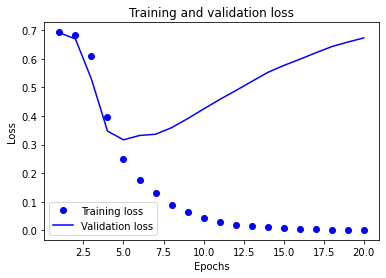

In [55]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and validation loss를 그려 보면, 몇 epoch까지의 트레이닝이 적절한지 최적점을 추정해 볼 수 있습니다.    
validation loss의 그래프가 train loss와의 이격이 발생하게 되면 더이상의 트레이닝은 무의미해지게 마련입니다.

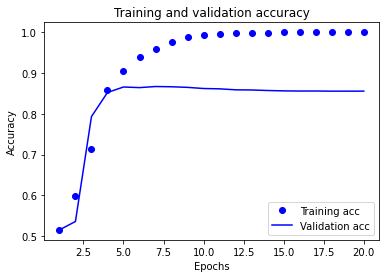

In [56]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

마찬가지로 Training and validation accuracy를 그려 보아도 유사한 인사이트를 얻을 수 있습니다.

### -10. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용
이전 스텝에서 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법으로    
단어의 특성을 저차원 벡터값으로 표현할 수 있는 `워드 임베딩(word embedding)` 기법이 있다는 언급을 한 바 있습니다.

우리는 이미 이전 스텝에서 워드 임베딩을 사용했습니다. 사용했던 model의 첫번째 레이어는 바로 Embedding 레이어였습니다.    
이 레이어는 우리가 가진 사전의 단어 개수 X 워드벡터 사이즈만큼의 크기를 가진 학습 파라미터였습니다.     
만약 우리의 감성분류 모델이 학습이 잘 되었다면, Embedding 레이어에 학습된 우리의 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것입니다. 한번 확인해 봅시다.

이번 스텝부터 워드벡터 파일을 저장할 디렉토리를 먼저 생성합시다. 그리고 워드벡터를 다루는데 유용한 `gensim` 패키지를 설치합시다.

$ mkdir -p ~/aiffel/sentiment_classification 

$ pip install gensim    

In [ ]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

In [ ]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

`gensim`에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 `word vector`로 활용할 수 있습니다.

In [ ]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

위와 같이 얻은 워드 벡터를 가지고 재미있는 실험을 해볼 수 있습니다. 
워드 벡터가 의미벡터 공간상에 유의미하게 학습되었는지 확인하는 방법 중에, 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하는 방법이 있습니다. 
`gensim`을 사용하면 아래와 같이 해볼 수 있습니다.

In [ ]:
word_vectors.similar_by_word("love")

어떻습니까? love라는 단어와 유사한 다른 단어를 그리 잘 찾았다고 느껴지지는 않습니다. 감성분류 태스크를 잠깐 학습한 것만으로 워드벡터가 유의미하게 학습되기는 어려운 것 같습니다. 우리가 다룬 정도의 훈련데이터로는 워드벡터를 정교하게 학습시키기 어렵습니다.

그래서 이번에는 구글에서 제공하는 Word2Vec이라는 사전학습된(Pretrained) 워드 임베딩 모델을 가져다 활용해 보겠습니다. Word2Vec은 무려 1억개의 단어로 구성된 Google News dataset을 바탕으로 학습되었습니다. 총 300만개의 단어를 각각 300차원의 벡터로 표현한 것입니다. Word2Vec이 학습되는 원리에 대해서는 차후 깊이있게 다루게 될 것입니다. 하지만 그렇게 해서 학습된 Word2Vec이라는 것도 실은 방금 우리가 파일에 써본 Embedding Layer와 원리는 동일합니다.

임베딩의 개념에 대해 아주 잘 정리된 책 한국어 임베딩의 서론에서 왜 사전학습된 임베딩을 활용하는 것이 유리한지 설명해 주고 있습니다. 바로 전이학습 때문입니다. 

https://ratsgo.github.io/natural%20language%20processing/2019/09/12/embedding/

그러면 본격적으로 Google의 Word2Vec 모델을 가져와 적용해 봅시다.    
이 링크를 클릭하면 무려 1.5GB 이상의 파일을 다운받게 됩니다.    
다운받은 후에는 다음과 같이 진행해 봅시다.   
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit


$ mv ~/Downloads/GoogleNews-vectors-negative300.bin.gz ~/aiffel/sentiment_classification

In [ ]:
from gensim.models import KeyedVectors
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

300dim의 벡터로 이루어진 300만개의 단어입니다.    
이 단어 사전을 메모리에 모두 로딩하면 아주 높은 확률로 여러분의 실습환경에 메모리 에러가 날 것입니다.    
그래서 KeyedVectors.load_word2vec_format 메소드로 워드벡터를 로딩할 때    
가장 많이 사용되는 상위 100만개만 limt으로 조건을 주어 로딩했습니다.   

메모리가 충분하다면 limt=`None`으로 하시면 300만개를 모두 로딩합니다.

In [ ]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

어떻습니까?    
Word2Vec에서 제공하는 워드 임베딩 벡터들끼리는 의미적 유사도가 가까운 것이 서로 가깝게 제대로 학습된 것을 확인할 수 있습니다.    
이제 우리는 이전 스텝에서 학습했던 모델의 임베딩 레이어를 Word2Vec의 것으로 교체하여 다시 학습시켜 볼 것입니다.

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [ ]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

In [ ]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [ ]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

어떻습니까?    
Word2Vec을 정상적으로 잘 활용하면 그렇지 않은 경우보다 5% 이상의 성능향상이 발생합니다.    
적절한 모델구성, 하이퍼파라미터를 고려하여 감정분석 모델의 성능을 최대한으로 끌어올려 봅시다.   

### 4-11. 프로젝트 : 네이버 영화리뷰 감성분석 도전하기
이전 스텝까지는 영문 텍스트의 감정분석을 진행해 보았습니다. 그렇다면 이번에는 한국어 텍스트의 감정분석을 진행해 보면 어떨까요? 오늘 활용할 데이터셋은 네이버 영화의 댓글을 모아 구성된 Naver sentiment movie corpus입니다.

아래와 같이 다운로드를 진행해 주세요.
$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt   

$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt   

$ mv ratings_*.txt ~/aiffel/sentiment_classification    

프로젝트 진행 순서는 다음과 같습니다.   
1) 데이터 준비와 확인  

2) 데이터로더 구성  
    실습때 다루었던 IMDB 데이터셋은 텍스트를 가공하여 imdb.data_loader() 메소드를 호출하면 숫자 인덱스로 변환된 텍스트와 word_to_index 딕셔너리까지 친절하게 제공합니다. 그러나 이번에 다루게 될 nsmc 데이터셋은 전혀 가공되지 않은 텍스트 파일로 이루어져 있습니다. 이것을 읽어서 imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작합니다. data_loader 안에서는 다음을 수행해야 합니다.

- 데이터의 중복 제거
- NaN 결측치 제거
- 한국어 토크나이저로 토큰화
- 불용어(Stopwords) 제거
- 사전word_to_index 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환
- X_train, y_train, X_test, y_test, word_to_index 리턴

3) 모델구성을 위한 데이터 분석 및 가공  
- 데이터셋 내 문장 길이 분포
- 적절한 최대 문장 길이 지정
- keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

4) 모델구성 및 validation set 구성
- 모델은 3가지 이상 다양하게 구성하여 실험해 보세요.

5) 모델 훈련 개시  

6) Loss, Accuracy 그래프 시각화  

7) 학습된 Embedding 레이어 분석   

8) 한국어 Word2Vec 임베딩 활용하여 성능개선   


In [1]:
# 1) 데이터 준비와 확인

import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [2]:
# 2) 데이터로더 구성

from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [3]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [4]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]